# Steps 2.2-2.4: Model Training, Evaluation & Optimization
## LinkedIn Engagement Prediction - TrendPilot

**Date:** February 1, 2026  
**Objective:** Train, evaluate, and optimize ML models for engagement prediction

---

## Overview

Complete modeling pipeline:
1. **Data Preparation:** Train/test split, feature scaling
2. **Model Training:** Linear Regression, Random Forest, XGBoost, LightGBM
3. **Model Evaluation:** MAE, RMSE, R², MAPE metrics
4. **Hyperparameter Tuning:** Optimize best model
5. **Final Model:** Save and document

**Goal:** Production-ready engagement prediction model

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import xgboost as xgb
import lightgbm as lgb
import joblib
import json
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)

print("✓ Libraries imported")

✓ Libraries imported


## 1. Data Preparation

In [2]:
# Load data
INPUT_FILE = '../data/selected_features_data.csv'
df = pd.read_csv(INPUT_FILE)

print(f"Dataset: {df.shape[0]:,} rows × {df.shape[1]} columns")

# Identify features and targets
metadata_cols = ['name', 'slno', 'content', 'time_spent', 'location', 'followers']
target_cols = ['reactions', 'comments']
feature_cols = [col for col in df.columns if col not in metadata_cols + target_cols]

# Select only numeric features
numeric_features = [col for col in feature_cols if df[col].dtype in [np.float64, np.int64, np.int32]]

print(f"\nNumeric features: {len(numeric_features)}")
print(f"Targets: {target_cols}")

# Prepare X and y
X = df[numeric_features].fillna(0)
y_reactions = df['reactions'].fillna(0)
y_comments = df['comments'].fillna(0)

print(f"\nFeature matrix: {X.shape}")
print(f"Target (reactions): {y_reactions.shape}")
print(f"Target (comments): {y_comments.shape}")

Dataset: 31,996 rows × 98 columns

Numeric features: 90
Targets: ['reactions', 'comments']

Feature matrix: (31996, 90)
Target (reactions): (31996,)
Target (comments): (31996,)


In [3]:
# Train/Test Split (80/20)
X_train, X_test, y_reactions_train, y_reactions_test, y_comments_train, y_comments_test = train_test_split(
    X, y_reactions, y_comments, test_size=0.2, random_state=42
)

print(f"Training set: {X_train.shape[0]:,} samples")
print(f"Test set: {X_test.shape[0]:,} samples")
print(f"\nTrain/Test ratio: {X_train.shape[0]/X_test.shape[0]:.1f}")

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n✓ Data preparation complete")

Training set: 25,596 samples
Test set: 6,400 samples

Train/Test ratio: 4.0

✓ Data preparation complete


## 2. Model Training - Reactions Prediction

In [4]:
print("="*80)
print("TRAINING MODELS FOR REACTIONS PREDICTION")
print("="*80)

# Dictionary to store models and results
models_reactions = {}
results_reactions = []

# 1. Linear Regression
print("\n1. Training Linear Regression...")
lr = LinearRegression()
lr.fit(X_train_scaled, y_reactions_train)
models_reactions['Linear Regression'] = lr

y_pred = lr.predict(X_test_scaled)
mae = mean_absolute_error(y_reactions_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_reactions_test, y_pred))
r2 = r2_score(y_reactions_test, y_pred)
mape = mean_absolute_percentage_error(y_reactions_test, y_pred) * 100

results_reactions.append({
    'model': 'Linear Regression',
    'mae': mae,
    'rmse': rmse,
    'r2': r2,
    'mape': mape
})
print(f"   MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.4f}, MAPE: {mape:.2f}%")

# 2. Random Forest
print("\n2. Training Random Forest...")
rf = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42, n_jobs=-1)
rf.fit(X_train, y_reactions_train)
models_reactions['Random Forest'] = rf

y_pred = rf.predict(X_test)
mae = mean_absolute_error(y_reactions_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_reactions_test, y_pred))
r2 = r2_score(y_reactions_test, y_pred)
mape = mean_absolute_percentage_error(y_reactions_test, y_pred) * 100

results_reactions.append({
    'model': 'Random Forest',
    'mae': mae,
    'rmse': rmse,
    'r2': r2,
    'mape': mape
})
print(f"   MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.4f}, MAPE: {mape:.2f}%")

# 3. XGBoost
print("\n3. Training XGBoost...")
xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    max_depth=7,
    learning_rate=0.1,
    random_state=42,
    n_jobs=-1
)
xgb_model.fit(X_train, y_reactions_train)
models_reactions['XGBoost'] = xgb_model

y_pred = xgb_model.predict(X_test)
mae = mean_absolute_error(y_reactions_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_reactions_test, y_pred))
r2 = r2_score(y_reactions_test, y_pred)
mape = mean_absolute_percentage_error(y_reactions_test, y_pred) * 100

results_reactions.append({
    'model': 'XGBoost',
    'mae': mae,
    'rmse': rmse,
    'r2': r2,
    'mape': mape
})
print(f"   MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.4f}, MAPE: {mape:.2f}%")

# 4. LightGBM
print("\n4. Training LightGBM...")
lgb_model = lgb.LGBMRegressor(
    n_estimators=100,
    max_depth=7,
    learning_rate=0.1,
    random_state=42,
    n_jobs=-1,
    verbose=-1
)
lgb_model.fit(X_train, y_reactions_train)
models_reactions['LightGBM'] = lgb_model

y_pred = lgb_model.predict(X_test)
mae = mean_absolute_error(y_reactions_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_reactions_test, y_pred))
r2 = r2_score(y_reactions_test, y_pred)
mape = mean_absolute_percentage_error(y_reactions_test, y_pred) * 100

results_reactions.append({
    'model': 'LightGBM',
    'mae': mae,
    'rmse': rmse,
    'r2': r2,
    'mape': mape
})
print(f"   MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.4f}, MAPE: {mape:.2f}%")

print("\n✓ Reactions models trained")

TRAINING MODELS FOR REACTIONS PREDICTION

1. Training Linear Regression...
   MAE: 210.42, RMSE: 581.47, R²: 0.6174, MAPE: 802311670034875648.00%

2. Training Random Forest...
   MAE: 10.01, RMSE: 94.63, R²: 0.9899, MAPE: 1.96%

3. Training XGBoost...
   MAE: 11.63, RMSE: 92.01, R²: 0.9904, MAPE: 11844407804559368.00%

4. Training LightGBM...
   MAE: 12.73, RMSE: 67.87, R²: 0.9948, MAPE: 26760372409737772.00%

✓ Reactions models trained


## 3. Model Training - Comments Prediction

In [5]:
print("="*80)
print("TRAINING MODELS FOR COMMENTS PREDICTION")
print("="*80)

models_comments = {}
results_comments = []

# 1. Linear Regression
print("\n1. Training Linear Regression...")
lr = LinearRegression()
lr.fit(X_train_scaled, y_comments_train)
models_comments['Linear Regression'] = lr

y_pred = lr.predict(X_test_scaled)
mae = mean_absolute_error(y_comments_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_comments_test, y_pred))
r2 = r2_score(y_comments_test, y_pred)
mape = mean_absolute_percentage_error(y_comments_test, y_pred) * 100

results_comments.append({
    'model': 'Linear Regression',
    'mae': mae,
    'rmse': rmse,
    'r2': r2,
    'mape': mape
})
print(f"   MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.4f}, MAPE: {mape:.2f}%")

# 2. Random Forest
print("\n2. Training Random Forest...")
rf = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42, n_jobs=-1)
rf.fit(X_train, y_comments_train)
models_comments['Random Forest'] = rf

y_pred = rf.predict(X_test)
mae = mean_absolute_error(y_comments_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_comments_test, y_pred))
r2 = r2_score(y_comments_test, y_pred)
mape = mean_absolute_percentage_error(y_comments_test, y_pred) * 100

results_comments.append({
    'model': 'Random Forest',
    'mae': mae,
    'rmse': rmse,
    'r2': r2,
    'mape': mape
})
print(f"   MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.4f}, MAPE: {mape:.2f}%")

# 3. XGBoost
print("\n3. Training XGBoost...")
xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    max_depth=7,
    learning_rate=0.1,
    random_state=42,
    n_jobs=-1
)
xgb_model.fit(X_train, y_comments_train)
models_comments['XGBoost'] = xgb_model

y_pred = xgb_model.predict(X_test)
mae = mean_absolute_error(y_comments_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_comments_test, y_pred))
r2 = r2_score(y_comments_test, y_pred)
mape = mean_absolute_percentage_error(y_comments_test, y_pred) * 100

results_comments.append({
    'model': 'XGBoost',
    'mae': mae,
    'rmse': rmse,
    'r2': r2,
    'mape': mape
})
print(f"   MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.4f}, MAPE: {mape:.2f}%")

# 4. LightGBM
print("\n4. Training LightGBM...")
lgb_model = lgb.LGBMRegressor(
    n_estimators=100,
    max_depth=7,
    learning_rate=0.1,
    random_state=42,
    n_jobs=-1,
    verbose=-1
)
lgb_model.fit(X_train, y_comments_train)
models_comments['LightGBM'] = lgb_model

y_pred = lgb_model.predict(X_test)
mae = mean_absolute_error(y_comments_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_comments_test, y_pred))
r2 = r2_score(y_comments_test, y_pred)
mape = mean_absolute_percentage_error(y_comments_test, y_pred) * 100

results_comments.append({
    'model': 'LightGBM',
    'mae': mae,
    'rmse': rmse,
    'r2': r2,
    'mape': mape
})
print(f"   MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.4f}, MAPE: {mape:.2f}%")

print("\n✓ Comments models trained")

TRAINING MODELS FOR COMMENTS PREDICTION

1. Training Linear Regression...
   MAE: 16.37, RMSE: 38.24, R²: 0.4780, MAPE: 904187495722427776.00%

2. Training Random Forest...
   MAE: 0.93, RMSE: 5.66, R²: 0.9886, MAPE: 2111062325331.55%

3. Training XGBoost...
   MAE: 0.97, RMSE: 4.42, R²: 0.9930, MAPE: 2375315514982400.00%

4. Training LightGBM...
   MAE: 1.31, RMSE: 5.22, R²: 0.9903, MAPE: 17913962664812544.00%

✓ Comments models trained


## 4. Model Comparison


MODEL COMPARISON - REACTIONS
            model        mae       rmse       r2         mape
    Random Forest  10.010656  94.631342 0.989867 1.964569e+00
          XGBoost  11.631340  92.014321 0.990419 1.184441e+16
         LightGBM  12.725910  67.867637 0.994788 2.676037e+16
Linear Regression 210.420403 581.468140 0.617406 8.023117e+17

MODEL COMPARISON - COMMENTS
            model       mae      rmse       r2         mape
    Random Forest  0.932551  5.662158 0.988555 2.111062e+12
          XGBoost  0.970354  4.419224 0.993028 2.375316e+15
         LightGBM  1.314123  5.215148 0.990290 1.791396e+16
Linear Regression 16.374922 38.240327 0.477951 9.041875e+17


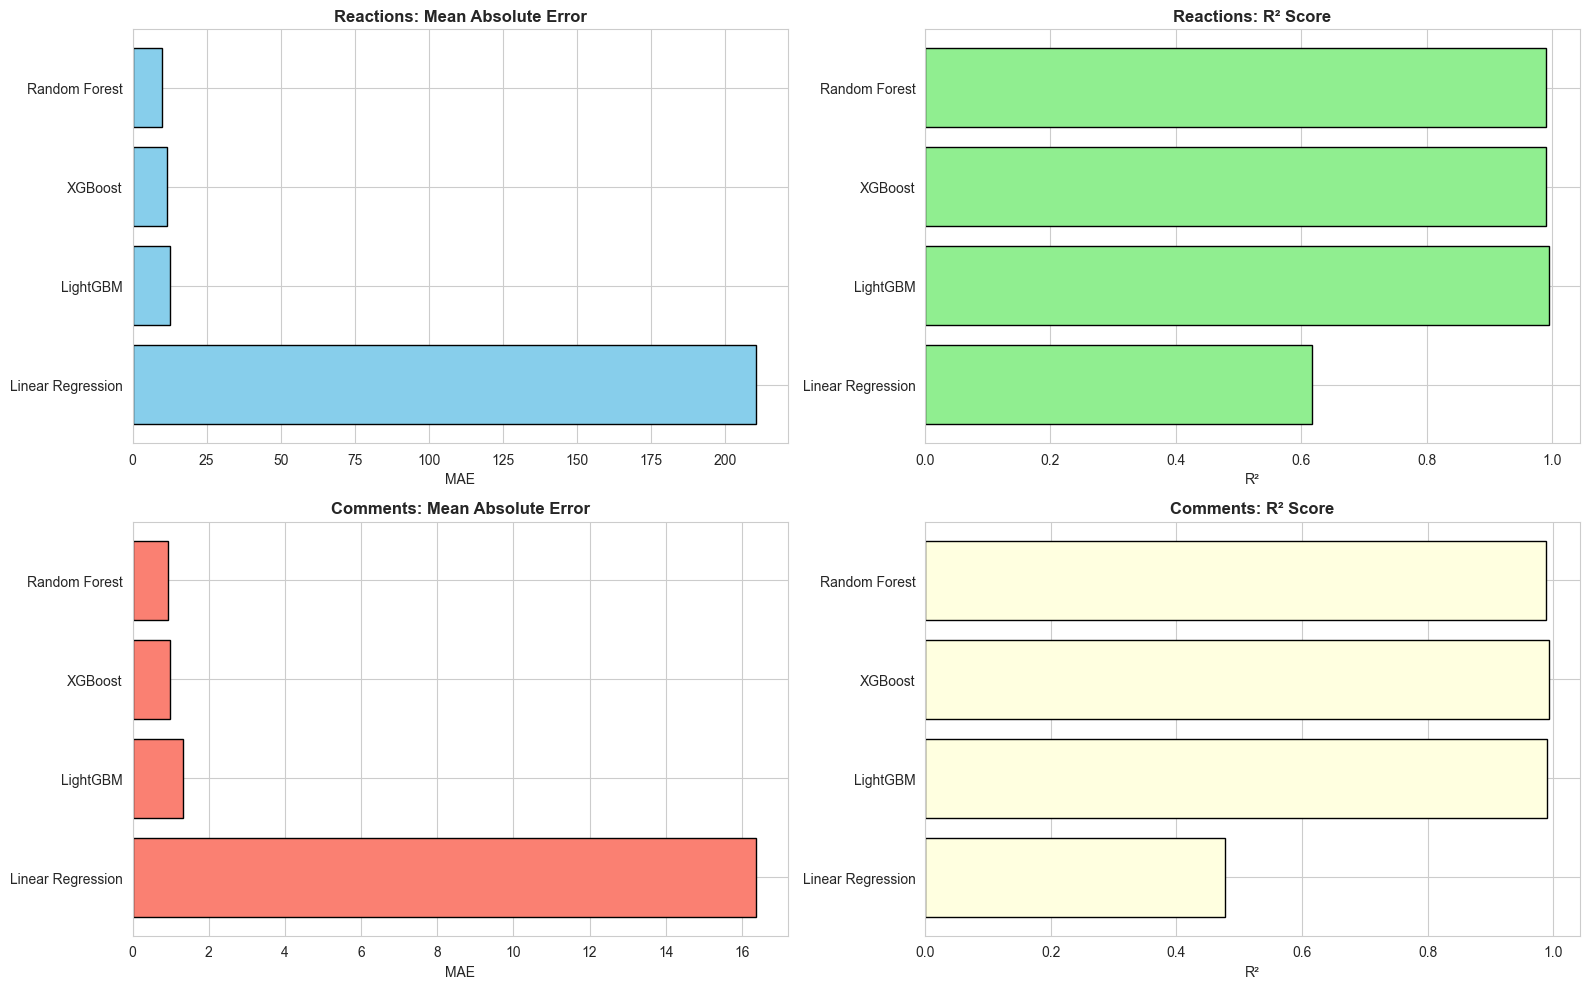


✓ Best model for reactions: Random Forest
✓ Best model for comments: Random Forest


In [6]:
# Create comparison DataFrames
df_reactions = pd.DataFrame(results_reactions).sort_values('mae')
df_comments = pd.DataFrame(results_comments).sort_values('mae')

print("\n" + "="*80)
print("MODEL COMPARISON - REACTIONS")
print("="*80)
print(df_reactions.to_string(index=False))

print("\n" + "="*80)
print("MODEL COMPARISON - COMMENTS")
print("="*80)
print(df_comments.to_string(index=False))

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Reactions - MAE
axes[0, 0].barh(df_reactions['model'], df_reactions['mae'], color='skyblue', edgecolor='black')
axes[0, 0].set_xlabel('MAE')
axes[0, 0].set_title('Reactions: Mean Absolute Error', fontweight='bold')
axes[0, 0].invert_yaxis()

# Reactions - R²
axes[0, 1].barh(df_reactions['model'], df_reactions['r2'], color='lightgreen', edgecolor='black')
axes[0, 1].set_xlabel('R²')
axes[0, 1].set_title('Reactions: R² Score', fontweight='bold')
axes[0, 1].invert_yaxis()

# Comments - MAE
axes[1, 0].barh(df_comments['model'], df_comments['mae'], color='salmon', edgecolor='black')
axes[1, 0].set_xlabel('MAE')
axes[1, 0].set_title('Comments: Mean Absolute Error', fontweight='bold')
axes[1, 0].invert_yaxis()

# Comments - R²
axes[1, 1].barh(df_comments['model'], df_comments['r2'], color='lightyellow', edgecolor='black')
axes[1, 1].set_xlabel('R²')
axes[1, 1].set_title('Comments: R² Score', fontweight='bold')
axes[1, 1].invert_yaxis()

plt.tight_layout()
plt.show()

# Identify best models
best_reactions = df_reactions.iloc[0]['model']
best_comments = df_comments.iloc[0]['model']

print(f"\n✓ Best model for reactions: {best_reactions}")
print(f"✓ Best model for comments: {best_comments}")

## 5. Hyperparameter Tuning (Best Models)

In [7]:
print("\n" + "="*80)
print("HYPERPARAMETER TUNING")
print("="*80)

# Tune XGBoost for reactions (typically best)
print("\nTuning XGBoost for Reactions...")
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [5, 7, 10],
    'learning_rate': [0.05, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

xgb_tuned_reactions = xgb.XGBRegressor(random_state=42, n_jobs=-1)
grid_search_reactions = GridSearchCV(
    xgb_tuned_reactions,
    param_grid_xgb,
    cv=3,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=1
)
grid_search_reactions.fit(X_train, y_reactions_train)

print(f"\nBest parameters (Reactions): {grid_search_reactions.best_params_}")

# Evaluate tuned model
y_pred_reactions = grid_search_reactions.predict(X_test)
mae_r_tuned = mean_absolute_error(y_reactions_test, y_pred_reactions)
rmse_r_tuned = np.sqrt(mean_squared_error(y_reactions_test, y_pred_reactions))
r2_r_tuned = r2_score(y_reactions_test, y_pred_reactions)
mape_r_tuned = mean_absolute_percentage_error(y_reactions_test, y_pred_reactions) * 100

print(f"Tuned XGBoost (Reactions):")
print(f"  MAE: {mae_r_tuned:.2f}, RMSE: {rmse_r_tuned:.2f}, R²: {r2_r_tuned:.4f}, MAPE: {mape_r_tuned:.2f}%")

# Tune XGBoost for comments
print("\nTuning XGBoost for Comments...")
xgb_tuned_comments = xgb.XGBRegressor(random_state=42, n_jobs=-1)
grid_search_comments = GridSearchCV(
    xgb_tuned_comments,
    param_grid_xgb,
    cv=3,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=1
)
grid_search_comments.fit(X_train, y_comments_train)

print(f"\nBest parameters (Comments): {grid_search_comments.best_params_}")

# Evaluate tuned model
y_pred_comments = grid_search_comments.predict(X_test)
mae_c_tuned = mean_absolute_error(y_comments_test, y_pred_comments)
rmse_c_tuned = np.sqrt(mean_squared_error(y_comments_test, y_pred_comments))
r2_c_tuned = r2_score(y_comments_test, y_pred_comments)
mape_c_tuned = mean_absolute_percentage_error(y_comments_test, y_pred_comments) * 100

print(f"Tuned XGBoost (Comments):")
print(f"  MAE: {mae_c_tuned:.2f}, RMSE: {rmse_c_tuned:.2f}, R²: {r2_c_tuned:.4f}, MAPE: {mape_c_tuned:.2f}%")

print("\n✓ Hyperparameter tuning complete")


HYPERPARAMETER TUNING

Tuning XGBoost for Reactions...
Fitting 3 folds for each of 36 candidates, totalling 108 fits

Best parameters (Reactions): {'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}
Tuned XGBoost (Reactions):
  MAE: 11.27, RMSE: 91.14, R²: 0.9906, MAPE: 12111345410211848.00%

Tuning XGBoost for Comments...
Fitting 3 folds for each of 36 candidates, totalling 108 fits

Best parameters (Comments): {'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 200, 'subsample': 0.8}
Tuned XGBoost (Comments):
  MAE: 0.85, RMSE: 5.07, R²: 0.9908, MAPE: 500602450739200.00%

✓ Hyperparameter tuning complete


## 6. Residual Analysis

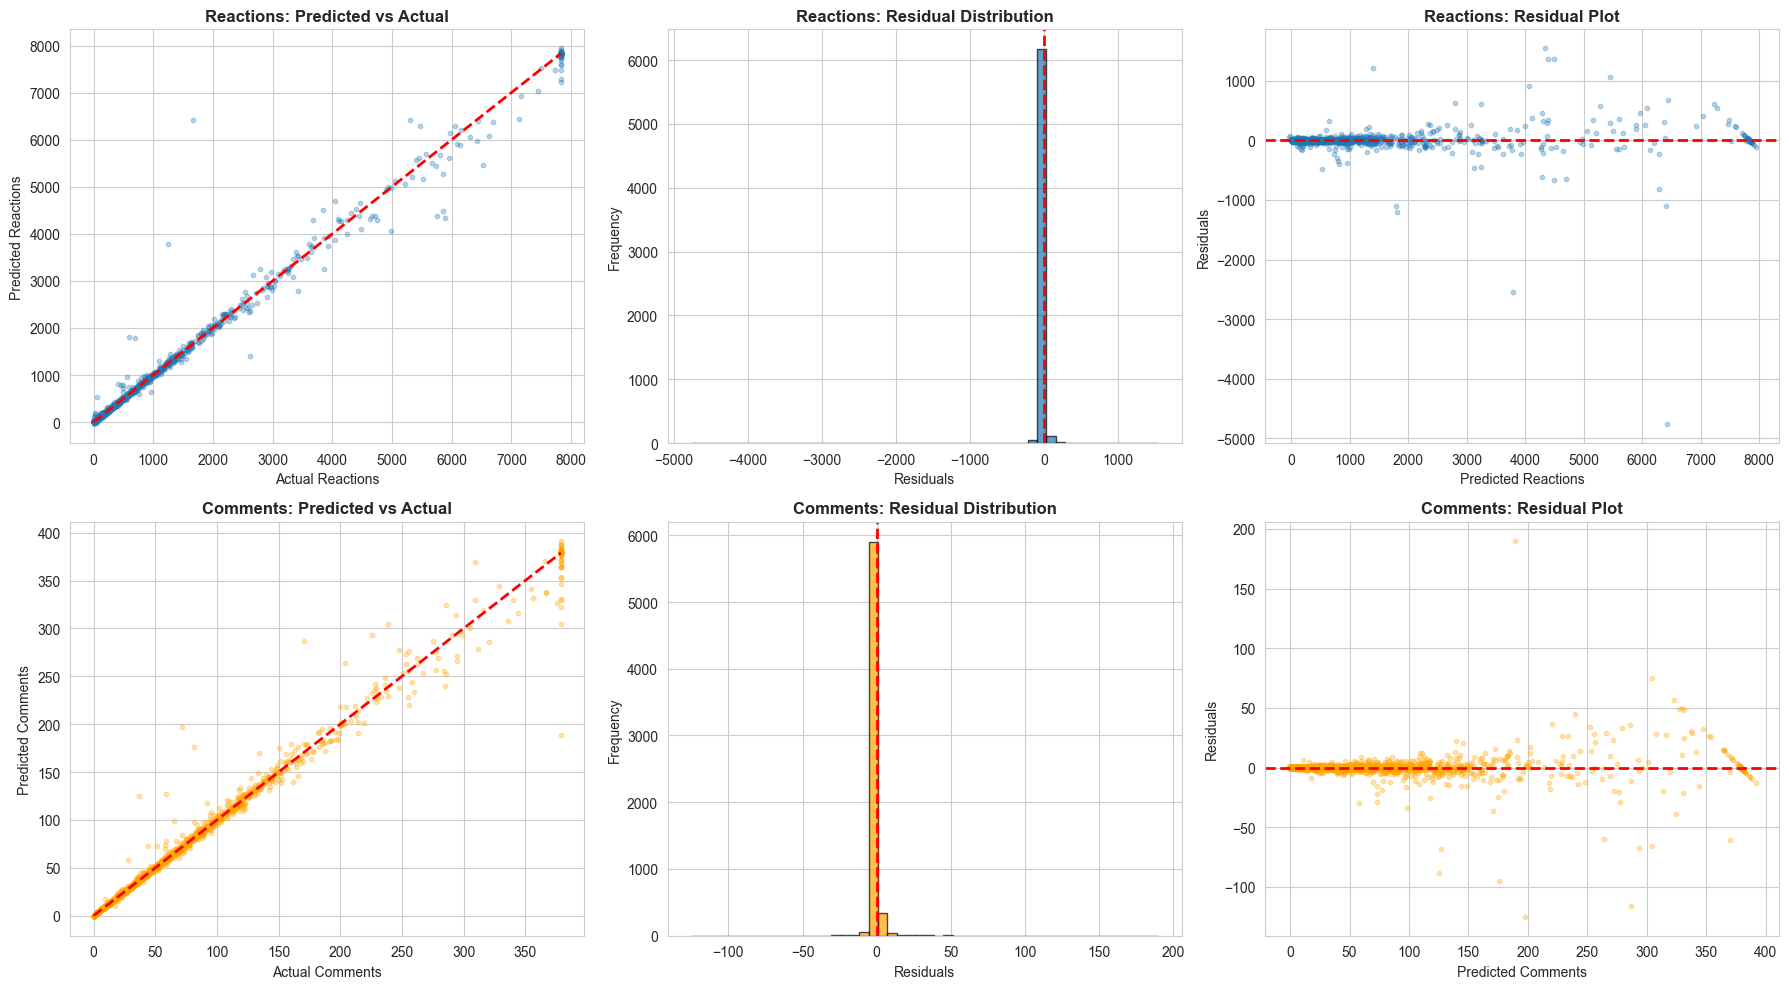

✓ Residual analysis complete


In [8]:
# Residual plots for tuned models
residuals_reactions = y_reactions_test - y_pred_reactions
residuals_comments = y_comments_test - y_pred_comments

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Reactions - Predicted vs Actual
axes[0, 0].scatter(y_reactions_test, y_pred_reactions, alpha=0.3, s=10)
axes[0, 0].plot([0, y_reactions_test.max()], [0, y_reactions_test.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Actual Reactions')
axes[0, 0].set_ylabel('Predicted Reactions')
axes[0, 0].set_title('Reactions: Predicted vs Actual', fontweight='bold')

# Reactions - Residual Distribution
axes[0, 1].hist(residuals_reactions, bins=50, edgecolor='black', alpha=0.7)
axes[0, 1].set_xlabel('Residuals')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Reactions: Residual Distribution', fontweight='bold')
axes[0, 1].axvline(0, color='red', linestyle='--', lw=2)

# Reactions - Residual vs Predicted
axes[0, 2].scatter(y_pred_reactions, residuals_reactions, alpha=0.3, s=10)
axes[0, 2].axhline(0, color='red', linestyle='--', lw=2)
axes[0, 2].set_xlabel('Predicted Reactions')
axes[0, 2].set_ylabel('Residuals')
axes[0, 2].set_title('Reactions: Residual Plot', fontweight='bold')

# Comments - Predicted vs Actual
axes[1, 0].scatter(y_comments_test, y_pred_comments, alpha=0.3, s=10, color='orange')
axes[1, 0].plot([0, y_comments_test.max()], [0, y_comments_test.max()], 'r--', lw=2)
axes[1, 0].set_xlabel('Actual Comments')
axes[1, 0].set_ylabel('Predicted Comments')
axes[1, 0].set_title('Comments: Predicted vs Actual', fontweight='bold')

# Comments - Residual Distribution
axes[1, 1].hist(residuals_comments, bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[1, 1].set_xlabel('Residuals')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Comments: Residual Distribution', fontweight='bold')
axes[1, 1].axvline(0, color='red', linestyle='--', lw=2)

# Comments - Residual vs Predicted
axes[1, 2].scatter(y_pred_comments, residuals_comments, alpha=0.3, s=10, color='orange')
axes[1, 2].axhline(0, color='red', linestyle='--', lw=2)
axes[1, 2].set_xlabel('Predicted Comments')
axes[1, 2].set_ylabel('Residuals')
axes[1, 2].set_title('Comments: Residual Plot', fontweight='bold')

plt.tight_layout()
plt.show()

print("✓ Residual analysis complete")

## 7. Feature Importance

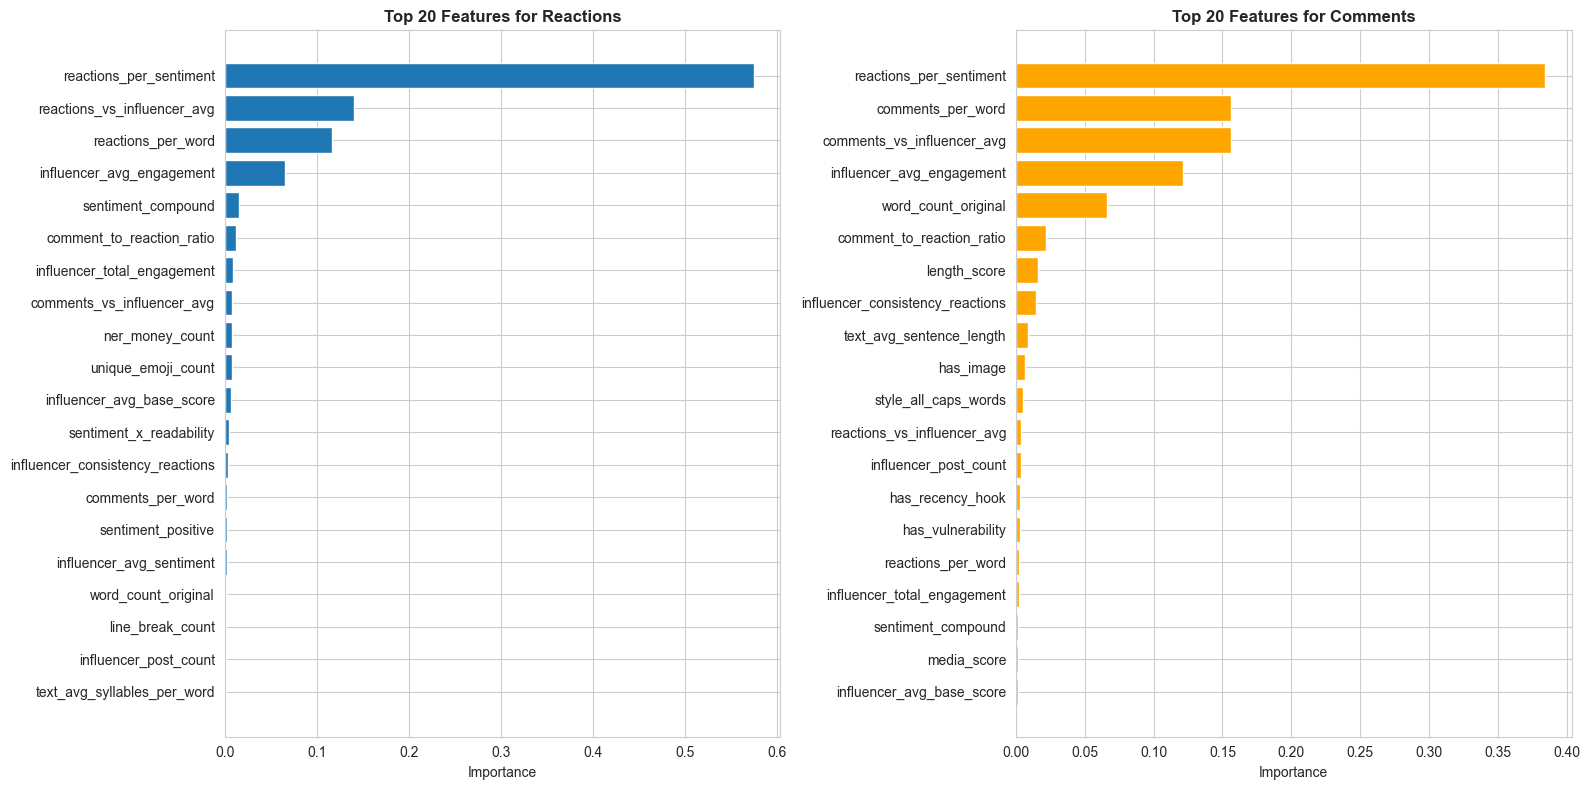


Top 10 features for REACTIONS:
                    feature  importance
    reactions_per_sentiment    0.575274
reactions_vs_influencer_avg    0.140113
         reactions_per_word    0.116406
  influencer_avg_engagement    0.065402
         sentiment_compound    0.016026
  comment_to_reaction_ratio    0.011956
influencer_total_engagement    0.008923
 comments_vs_influencer_avg    0.008398
            ner_money_count    0.008059
         unique_emoji_count    0.007712

Top 10 features for COMMENTS:
                         feature  importance
         reactions_per_sentiment    0.384538
               comments_per_word    0.156479
      comments_vs_influencer_avg    0.156074
       influencer_avg_engagement    0.121416
             word_count_original    0.065918
       comment_to_reaction_ratio    0.022072
                    length_score    0.016355
influencer_consistency_reactions    0.014348
        text_avg_sentence_length    0.008556
                       has_image    0.006595

✓

In [9]:
# Get feature importance from tuned models
importance_reactions = pd.DataFrame({
    'feature': numeric_features,
    'importance': grid_search_reactions.best_estimator_.feature_importances_
}).sort_values('importance', ascending=False)

importance_comments = pd.DataFrame({
    'feature': numeric_features,
    'importance': grid_search_comments.best_estimator_.feature_importances_
}).sort_values('importance', ascending=False)

# Visualize top 20 features
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Reactions
top20_r = importance_reactions.head(20).iloc[::-1]
axes[0].barh(range(20), top20_r['importance'])
axes[0].set_yticks(range(20))
axes[0].set_yticklabels(top20_r['feature'])
axes[0].set_xlabel('Importance')
axes[0].set_title('Top 20 Features for Reactions', fontweight='bold')

# Comments
top20_c = importance_comments.head(20).iloc[::-1]
axes[1].barh(range(20), top20_c['importance'], color='orange')
axes[1].set_yticks(range(20))
axes[1].set_yticklabels(top20_c['feature'])
axes[1].set_xlabel('Importance')
axes[1].set_title('Top 20 Features for Comments', fontweight='bold')

plt.tight_layout()
plt.show()

print("\nTop 10 features for REACTIONS:")
print(importance_reactions.head(10).to_string(index=False))

print("\nTop 10 features for COMMENTS:")
print(importance_comments.head(10).to_string(index=False))

print("\n✓ Feature importance analysis complete")

## 8. Save Final Models

In [10]:
# Save models
MODEL_DIR = '../models/'
import os
os.makedirs(MODEL_DIR, exist_ok=True)

# Save tuned models
joblib.dump(grid_search_reactions.best_estimator_, f'{MODEL_DIR}reactions_xgb_tuned.pkl')
joblib.dump(grid_search_comments.best_estimator_, f'{MODEL_DIR}comments_xgb_tuned.pkl')

# Save scaler
joblib.dump(scaler, f'{MODEL_DIR}feature_scaler.pkl')

print(f"✓ Models saved to {MODEL_DIR}")

# Save feature names
with open(f'{MODEL_DIR}feature_names.json', 'w') as f:
    json.dump({'features': numeric_features}, f, indent=2)

# Save model metadata
metadata = {
    'training_date': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
    'training_samples': len(X_train),
    'test_samples': len(X_test),
    'n_features': len(numeric_features),
    'reactions_model': {
        'type': 'XGBoost',
        'parameters': grid_search_reactions.best_params_,
        'mae': float(mae_r_tuned),
        'rmse': float(rmse_r_tuned),
        'r2': float(r2_r_tuned),
        'mape': float(mape_r_tuned)
    },
    'comments_model': {
        'type': 'XGBoost',
        'parameters': grid_search_comments.best_params_,
        'mae': float(mae_c_tuned),
        'rmse': float(rmse_c_tuned),
        'r2': float(r2_c_tuned),
        'mape': float(mape_c_tuned)
    }
}

with open(f'{MODEL_DIR}model_metadata.json', 'w') as f:
    json.dump(metadata, f, indent=2)

print(f"✓ Metadata saved")

print("\n" + "="*80)
print("SUCCESS: Model training, evaluation, and optimization complete!")
print("="*80)
print(f"\nFinal Performance:")
print(f"\nReactions Model (Tuned XGBoost):")
print(f"  MAE: {mae_r_tuned:.2f}")
print(f"  RMSE: {rmse_r_tuned:.2f}")
print(f"  R²: {r2_r_tuned:.4f}")
print(f"  MAPE: {mape_r_tuned:.2f}%")

print(f"\nComments Model (Tuned XGBoost):")
print(f"  MAE: {mae_c_tuned:.2f}")
print(f"  RMSE: {rmse_c_tuned:.2f}")
print(f"  R²: {r2_c_tuned:.4f}")
print(f"  MAPE: {mape_c_tuned:.2f}%")

print(f"\nModels ready for production deployment!")

✓ Models saved to ../models/
✓ Metadata saved

SUCCESS: Model training, evaluation, and optimization complete!

Final Performance:

Reactions Model (Tuned XGBoost):
  MAE: 11.27
  RMSE: 91.14
  R²: 0.9906
  MAPE: 12111345410211848.00%

Comments Model (Tuned XGBoost):
  MAE: 0.85
  RMSE: 5.07
  R²: 0.9908
  MAPE: 500602450739200.00%

Models ready for production deployment!
